In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2.2)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [18]:
import os
print(os.getcwd())
# os.chdir('../../csv/oracle')
print(os.getcwd())
[x for x in os.listdir(os.getcwd())]

/Users/massimo/Documents/OnExposureBias/synthetic_data_experiments/notebooks
/Users/massimo/Documents/OnExposureBias/synthetic_data_experiments/notebooks


['oracle_graphs.ipynb', 'synthetic_no_reg_.pdf', '.ipynb_checkpoints']

In [19]:
process = lambda path : pd.read_csv(path).drop_duplicates('Step')

csv_dir= '../../csv/oracle/'

gan_beta_cvo_oracle = process(csv_dir+'gan_beta_cvo_oracle.csv')
gan_beta_cvo_test   = process(csv_dir+'gan_beta_cvo_test.csv')

gan_beta_cvot_oracle = process(csv_dir+'gan_beta_cvot_oracle.csv')
gan_beta_cvot_test   = process(csv_dir+'gan_beta_cvot_test.csv')

gan_cvo_oracle = process(csv_dir+'gan_cvo_oracle.csv')
gan_cvo_test   = process(csv_dir+'gan_cvo_test.csv')

gan_cvot_oracle = process(csv_dir+'gan_cvot_oracle.csv')
gan_cvot_test   = process(csv_dir+'gan_cvot_test.csv')

gan_mle_oracle = process(csv_dir+'gan_mle_oracle.csv')
gan_mle_test   = process(csv_dir+'gan_mle_test.csv')

mle_cvo_oracle = process(csv_dir+'mle_cvo_oracle.csv')
mle_cvo_test   = process(csv_dir+'mle_cvo_test.csv')

mle_cvot_oracle = process(csv_dir+'mle_cvot_oracle.csv')
mle_cvot_test   = process(csv_dir+'mle_cvot_test.csv')

mle_cvt_oracle = process(csv_dir+'mle_cvt_oracle.csv')
mle_cvt_test   = process(csv_dir+'mle_cvt_test.csv')

cot_oracle = process(csv_dir+'cot_oracle.csv')
cot_test = process(csv_dir+'cot_test.csv')

leakgan_oracle = process(csv_dir+'leakgan_oracle.csv')
leakgan_test = process(csv_dir+'leakgan_test.csv')

seqgan_oracle = process(csv_dir+'seqgan_oracle.csv')
seqgan_test = process(csv_dir+'seqgan_test.csv')

nll_test       = process(csv_dir+'nll_test.csv')

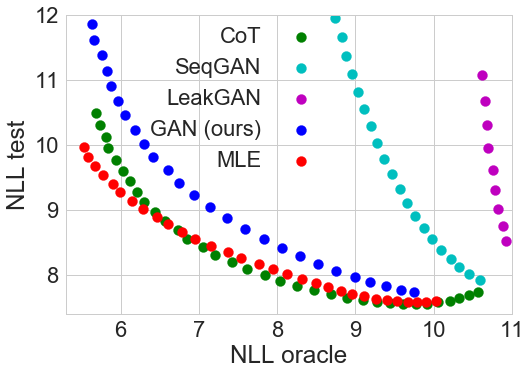

In [24]:
def get_size(pd_):
    size = [50] * len(pd_.Value)
    try:
        size[pd_[pd_.Step == 100].index[0]] = 200
    except:
        size[pd_[pd_.Step == 101].index[0]] = 200
    return size

def get_ec(c, pd_):
    ec  = [c] * len(pd_.Value)
    try:
        ec[pd_[pd_.Step == 100].index[0]] = 'k'
    except:
        ec[pd_[pd_.Step == 101].index[0]] = 'k'
    return ec

plt.scatter(cot_oracle.Value[::2], \
            cot_test.Value[::2], \
            c='g',
            label='CoT', 
            s=100)
            #s=get_size(cot_oracle)[1::2], 
            #edgecolors=get_ec('g', cot_oracle)[1::2], linewidth=3)

plt.scatter(seqgan_oracle.Value[::2], \
            seqgan_test.Value[::2], \
            c='c',
            label='SeqGAN',
            s=100)
            #s=get_size(seqgan_oracle)[1::2], 
            #edgecolors=get_ec('c', seqgan_oracle)[1::2], linewidth=3)

plt.scatter(leakgan_oracle.Value[::2], \
            leakgan_test.Value[::2], \
            c='m',
            label='LeakGAN',
            s=100)
            #s=get_size(leakgan_oracle)[1::2], 
            #edgecolors=get_ec('m', leakgan_test)[1::2], linewidth=3)

plt.scatter(gan_cvot_oracle.Value[::2], \
            gan_cvot_test.Value[::2], \
            c='b',
            label='GAN (ours)',
            s=100)
            #s=get_size(gan_cvot_oracle)[::2],
            #edgecolors=get_ec('b', gan_cvot_oracle)[::2], linewidth=3)


plt.scatter(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE',
            s=100)
            #s=get_size(mle_cvt_oracle)[::2],
            #edgecolors=get_ec('r', mle_cvt_oracle)[::2], linewidth=3)

# plt.scatter([8.19], [8.03], c='g', label='CoT')


plt.ylim(7.4, 12)
plt.xlim(5.3, 11)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False, loc=(0.17, 0.45))
plt.savefig('../..//figs/synthetic_no_reg_.pdf', bbox_inches='tight')
plt.show()


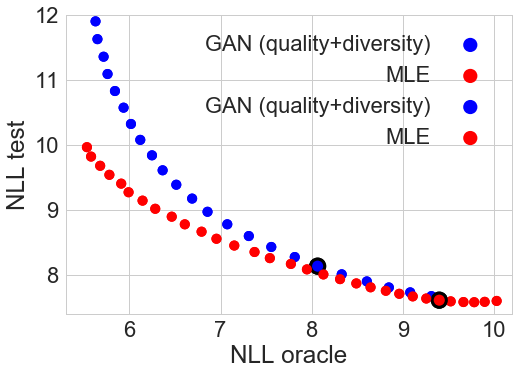

In [26]:

plt.scatter(gan_mle_oracle.Value[::2], \
            gan_mle_test.Value[::2], \
            c='b',
            label='GAN (quality+diversity)', 
            s=get_size(gan_mle_oracle)[::2], 
           edgecolors=get_ec('b', gan_mle_oracle)[::2], linewidth=3)


plt.scatter(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE', 
            s=get_size(mle_cvt_oracle)[::2], 
            edgecolors=get_ec('r', mle_cvt_oracle)[::2], linewidth=3)

plt.ylim(7.4, 12)
plt.xlim(5.3, 10.2)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False)
plt.savefig('../../figs/synthetic_MTI1.pdf', bbox_inches='tight')
plt.show()

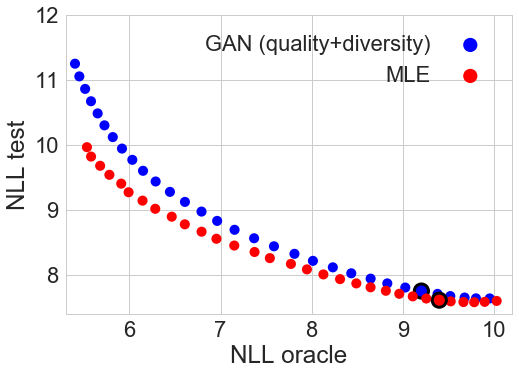

In [27]:
plt.scatter(gan_beta_cvot_oracle.Value[::2], \
            gan_beta_cvot_test.Value[::2], \
            c='b',
            label='GAN (quality+diversity)', 
            s=get_size(gan_beta_cvot_oracle)[::2], 
            edgecolors=get_ec('b', gan_beta_cvot_oracle)[::2], linewidth=3)

#plt.scatter(gan_beta_cvo_oracle.Value, \
#            gan_beta_cvo_test.Value, \
#            c='g',
#            label='GAN (quality)')


plt.scatter(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE', 
            s=get_size(mle_cvt_oracle)[::2], 
            edgecolors=get_ec('r', mle_cvt_oracle)[::2], linewidth=3)

plt.ylim(7.4, 12)
plt.xlim(5.3, 10.2)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False)
plt.savefig('../../figs/synthetic_beta.pdf', bbox_inches='tight')
plt.show()

# ENTROPY SECTION 

In [31]:
import os
entropy_path = '../../csv/oracle/entropy'
entropies = {}
for file in os.listdir(entropy_path):
    # get epochs : 
    epoch = int(file.split('entropy_')[-1].split('_')[0])
    if epoch > 80 : 
        epoch -= 40 # because of discriminator pretraining
        
    pd_ = process(os.path.join(entropy_path, file))
    entropies[epoch] = pd_
    

    

In [33]:
# once data is loaded, sort and reformat
max_epoch = max(entropies.keys())
max_t     = len(entropies[1])


ValueError: max() arg is an empty sequence

In [12]:
ent_array = np.zeros((max_epoch // 2, max_t))
for i in range(1,max_epoch, 2):
    ent = entropies[i]
    ent_array[i // 2] = np.array(ent.Value) 

NameError: name 'max_epoch' is not defined

In [13]:
nll_test_array = np.zeros(((nll_test.Step.shape[0]) - 20, ))
print(nll_test_array.shape)
for i in range(nll_test.Step.shape[0]):
    # if i > 150 : break
    
    if not (i > 19 and i < 40):
        ind = i if i < 19 else i - 20
        nll_test_array[ind] = nll_test.Value[i]
    
        
for i in range(nll_test_array.shape[0]):
    print(nll_test_array[i])

(130,)
2.458000898361206
2.325258016586304
2.2571334838867188
2.215271234512329
2.1861124038696294
2.1637616157531743
2.1462950706481934
2.1316969394683842
2.1203031539916988
2.1118543148040767
2.103471040725708
2.096149682998657
2.088509082794189
2.0832078456878658
2.07987380027771
2.073605298995972
2.069741487503052
2.06746244430542
2.0629336833953857
0.0
2.3973405361175537
2.372502565383911
2.366064071655273
2.3501126766204834
2.352686643600464
2.3329732418060303
2.322460651397705
2.3189027309417725
2.31890082359314
2.3357174396514893
2.3362419605255127
2.316344976425171
2.332394361495972
2.3330838680267334
2.3103067874908447
2.3185296058654785
2.310553312301636
2.307234287261963
2.3064277172088623
2.301873207092285
2.290488719940185
2.30314040184021
2.324086427688598
2.298482656478882
2.3109006881713867
2.305094957351685
2.298947811126709
2.30668044090271
2.3040666580200195
2.305914878845215
2.3138186931610107
2.3051087856292725
2.3010995388031006
2.303959608078003
2.30547118186950

In [14]:
nll_test_array


array([2.4580009 , 2.32525802, 2.25713348, 2.21527123, 2.1861124 ,
       2.16376162, 2.14629507, 2.13169694, 2.12030315, 2.11185431,
       2.10347104, 2.09614968, 2.08850908, 2.08320785, 2.0798738 ,
       2.0736053 , 2.06974149, 2.06746244, 2.06293368, 0.        ,
       2.39734054, 2.37250257, 2.36606407, 2.35011268, 2.35268664,
       2.33297324, 2.32246065, 2.31890273, 2.31890082, 2.33571744,
       2.33624196, 2.31634498, 2.33239436, 2.33308387, 2.31030679,
       2.31852961, 2.31055331, 2.30723429, 2.30642772, 2.30187321,
       2.29048872, 2.3031404 , 2.32408643, 2.29848266, 2.31090069,
       2.30509496, 2.29894781, 2.30668044, 2.30406666, 2.30591488,
       2.31381869, 2.30510879, 2.30109954, 2.30395961, 2.30547118,
       2.32024312, 2.31109238, 2.31556535, 2.30899668, 2.30973983,
       2.30209732, 2.30144286, 2.32393932, 2.32169914, 2.31188869,
       2.3134129 , 2.31705022, 2.30711055, 2.31380749, 2.31141257,
       2.32232308, 2.32547545, 2.3270762 , 2.31653094, 2.32872

In [15]:
plt.scatter(np.arange(ent_array.shape[0]) * 2, ent_array[:, :20].mean(axis=1), )
plt.xlabel('epochs')
plt.ylabel('entropy')
plt.plot([40, 40], [3, 5], 'r--', lw=2)
# plt.ylim(3, 4.5)
# plt.show()
plt.savefig('figs/entropy.png')


NameError: name 'ent_array' is not defined

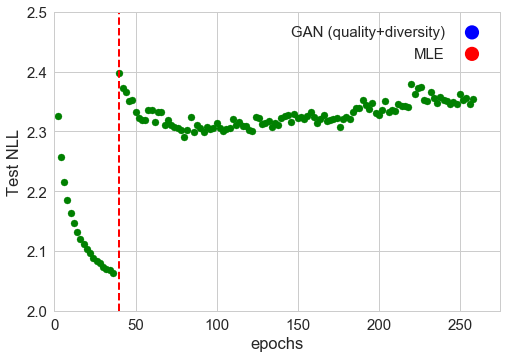

FileNotFoundError: [Errno 2] No such file or directory: 'figs/entropy_nll_test.png'

In [16]:
plt.scatter(np.arange(1,nll_test_array.shape[0]) * 2 , nll_test_array[1:], c='g')
plt.xlabel('epochs')
plt.ylabel('Test NLL')
plt.plot([40, 40], [2, 3], 'r--', lw=2)
plt.ylim(2, 2.5)
plt.xlim(-0.2, 275)
plt.show()
plt.savefig('figs/entropy_nll_test.png')

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2))

ax1.scatter(np.arange(ent_array.shape[0]) * 2, ent_array[:, :20].mean(axis=1), )
# ax1.set_xlabel('epochs')
ax1.set_ylabel('entropy')
ax1.plot([40, 40], [3, 5], 'r--', lw=2)
ax1.set_ylim(3, 5)
ax1.set_xlim(-0.2, 100)
ax1.set_yticklabels([3.000, 4.000, 5.000])
ax1.set_xlabel('epochs')


#plt.show()
# ax1.savefig('figs/entropy.png')

from matplotlib.ticker import FormatStrFormatter
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax2.scatter(np.arange(1,nll_test_array.shape[0]) * 2 , nll_test_array[1:], c='g')
ax2.set_ylabel('test NLL')
ax2.plot([40, 40], [2, 3], 'r--', lw=2)
ax2.set_ylim(2, 2.5)
ax2.set_xlim(-0.2, 100)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_coords(1.4,0.5)
ax2.set_xlabel('epochs')

# ax2.xaxis.set_label_coords(-.0001, -.1)
'''
ax2.set_xlim(-0.2, 275)
'''
plt.tight_layout()
plt.savefig('figs/ent_nll_tradeoff_.png')


##### 